In [1]:
!pip install opencv-python-headless imutils scikit-learn matplotlib


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils


In [3]:
from google.colab import files
uploaded = files.upload()  # This will open a file dialog to upload an image

img = cv2.imread('image.jpg')  # Replace with the name of the uploaded file


Saving image.jpg to image.jpg


In [4]:
clusters = 5  # Define number of clusters
org_img = img.copy()  # Copy the original image for later use
print('Original image shape --> ', img.shape)

# Resize image to reduce computation
img = imutils.resize(img, height=200)
print('Resized image shape --> ', img.shape)

# Flatten the image for KMeans clustering
flat_img = np.reshape(img, (-1, 3))
print('Flattened image shape --> ', flat_img.shape)


Original image shape -->  (1600, 1200, 3)
Resized image shape -->  (200, 150, 3)
Flattened image shape -->  (30000, 3)


In [5]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=clusters, random_state=0)
kmeans.fit(flat_img)

# Extract dominant colors
dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

# Calculate the percentage of each color
percentages = np.unique(kmeans.labels_, return_counts=True)[1] / flat_img.shape[0]
p_and_c = sorted(zip(percentages, dominant_colors), reverse=True)


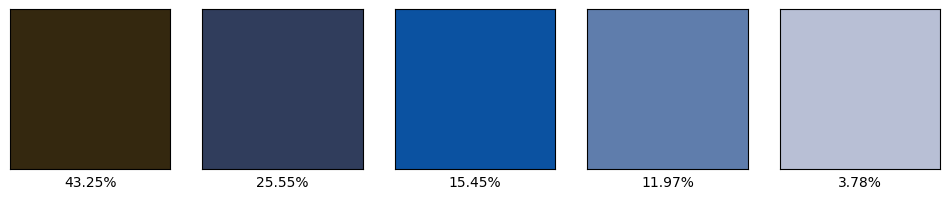

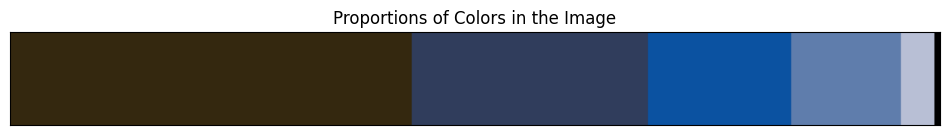

In [6]:
# Display each dominant color as a block
block = np.ones((50, 50, 3), dtype='uint8')
plt.figure(figsize=(12, 8))
for i in range(clusters):
    plt.subplot(1, clusters, i + 1)
    block[:] = p_and_c[i][1][::-1]  # Convert BGR to RGB
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"{round(p_and_c[i][0] * 100, 2)}%")

# Show proportions of colors in a bar
bar = np.ones((50, 500, 3), dtype='uint8')
plt.figure(figsize=(12, 8))
plt.title('Proportions of Colors in the Image')
start = 0
for i, (p, c) in enumerate(p_and_c):
    end = start + int(p * bar.shape[1])
    bar[:, start:end] = c[::-1]  # Convert BGR to RGB
    start = end

plt.imshow(bar)
plt.xticks([])
plt.yticks([])
plt.show()


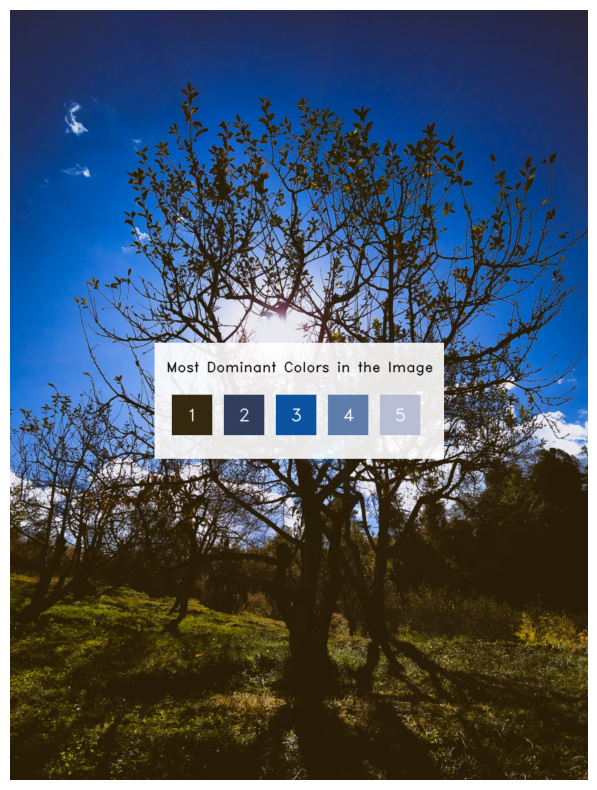

In [7]:
rows = 1000
cols = int((org_img.shape[0] / org_img.shape[1]) * rows)
img = cv2.resize(org_img, dsize=(rows, cols), interpolation=cv2.INTER_LINEAR)

copy = img.copy()
cv2.rectangle(copy, (rows // 2 - 250, cols // 2 - 90), (rows // 2 + 250, cols // 2 + 110), (255, 255, 255), -1)

# Blend the images
final = cv2.addWeighted(img, 0.1, copy, 0.9, 0)
cv2.putText(final, 'Most Dominant Colors in the Image', (rows // 2 - 230, cols // 2 - 40), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0, 0, 0), 1, cv2.LINE_AA)

# Place dominant color blocks
start = rows // 2 - 220
for i in range(clusters):
    end = start + 70
    final[cols // 2:cols // 2 + 70, start:end] = p_and_c[i][1]
    cv2.putText(final, str(i + 1), (start + 25, cols // 2 + 45), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 1, cv2.LINE_AA)
    start = end + 20

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
